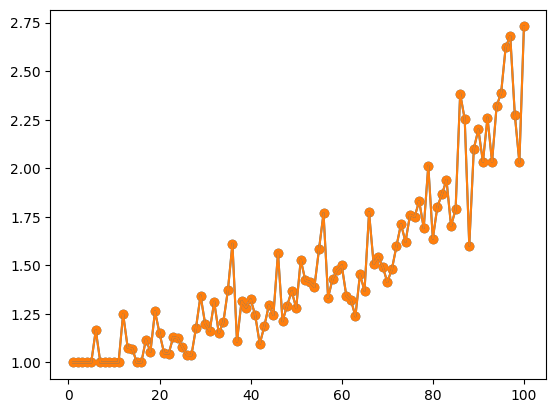

In [14]:
from matplotlib import pyplot as plt
import numpy as np

def my_hash(key: int, max_val: int) -> int:
    """genera un int aleatorio entre 0 y max_val-1 usando key como seed.
    """
    np.random.seed(key)
    return np.random.randint(max_val)


def generar_nies(num_nies: int, nie_min=400_000, nie_max=500_000) -> np.ndarray:
    """Genera un array con nunmeros aleatorios
    """
    return np.random.randint(nie_min, nie_max, num_nies)

def ini_hash_table(size_=200) -> np.ndarray:
    """Crea un array con Nones
    """
    return np.array(size_ * [None])
 
 
def linear_hash_search(nia: int, t_hash: np.ndarray)-> tuple[int, bool]:
    contador = my_hash(nia,len(t_hash)) #indice generado por el hash para situar dicho elemento en la tabla
    while contador<len(t_hash):
        if t_hash[contador] == nia:
            return (contador,True)
        elif t_hash[contador] == None:
            return (contador,False)
        contador +=1
    return (contador-1,False)
def linear_hash_insert(nia: int, t_hash: np.ndarray)-> int:
    a = linear_hash_search(nia,t_hash)
    if a[1] == False:
        t_hash[a[0]]= nia
    return a[0]

nia = 488490
z = ini_hash_table(75)
linear_hash_insert(nia,z)




def create_linear_hash_table(t_nias: np.ndarray,size = 200)-> np.ndarray:
    new_table = ini_hash_table(size)
    for element in t_nias:
       linear_hash_insert(element,new_table)
    return new_table


def linear_hash_search_count(nia: int, t_hash: np.ndarray)-> tuple [int, bool, int]:
    
    contador = my_hash(nia,len(t_hash)) #indice generado por el hash para situar dicho elemento en la tabla
    intentos = 1
    while contador<len(t_hash):
        if t_hash[contador] == nia:
            return (contador,True,intentos)
        elif t_hash[contador] == None:
            return (contador,False,intentos)
        contador +=1
        intentos +=1
    return (contador,False,intentos)
        
linear_hash_search_count(nia,z)


def linear_hash_search_average(num_nias, size_, fail=True)-> float:
    
    tabla = generar_nies(2*num_nias)
    hash = ini_hash_table(size_)
    for i in range(num_nias):
        nia = tabla[i]
        linear_hash_insert(nia,hash)     
    average = 0    
    if fail == True:
        
        for i in range(num_nias):
            h = tabla[i]
            a = linear_hash_search_count(h,hash)
            average += a[2]
        return average/num_nias
                   
    elif fail == False:
        
        for i in range(num_nias):
            h = tabla[i+num_nias]   
            a = linear_hash_search_count(h,hash)
            average += a[2]
        return average/num_nias
    
sondeos1 = []
eje_x1=[]
for i in range(1,101):
    sondeos1.append((linear_hash_search_average(i,200,False)))
    eje_x1.append(i)

plt.plot(eje_x1,sondeos1)
plt.scatter(eje_x1,sondeos1)
"""
sondeos1 = []
eje_x1=[]
for i in range(1,101):
    sondeos1.append((linear_hash_search_average(i,200,True)))
    eje_x1.append(i)
"""
plt.plot(eje_x1,sondeos1)
plt.scatter(eje_x1,sondeos1)





In [2]:

def max_heapify(h: np.ndarray, i: int):
    """Opreación Heapify sobre array numpy in place. De manera recursiva, va realizando heaps sobre arrays cada vez más pequeños.

    Args:
        h (np.ndarray): Array a transformar
        i (int): Elemento sobre el que aplicar heapify
    """
    while 2*i+1 < len(h):
        next_i = i

        if h[i] < h[2*i+1]:
            next_i = 2*i+1

        if 2*i+2 < len(h) and h[2*i+2] > h[next_i]:
            next_i = 2*i+2

        if next_i > i:
            h[i], h[next_i] = h[next_i], h[i]
            i = next_i

        else:
            return
    
    
'''    
    izquierda = 2*i + 1
    derecha = 2*i + 2
    mayor = i
    if derecha >= len(h) or mayor >= len(h) or izquierda >= len(h):
        return
    if izquierda < len(h)-1 and h[izquierda] > h[mayor]:
        mayor = izquierda
    if derecha < len(h)-1 and h[derecha] > h[mayor]:
        mayor = derecha

    if mayor != i:
        h[i], h[mayor] = h[mayor], h[i]
        max_heapify(h, mayor)'''

def create_maxheap(h: np.ndarray):
    """Crea un Max Heap sobre el array recibido utilizando las funciones anteriores de manera in place

    Args:
        h (np.ndarray): Array a transformar
    """

    for i in range((len(h)//2)-1, -1, -1):
        max_heapify(h, i)



        
def select_maxheap(h: np.ndarray, k: int)-> int:
    if k >= len(h):
        raise IndexError("Index is out of bounds")
    m_h = h[:k+1]
    create_maxheap(m_h)
    for i in range (k+1,len(h)):
        
        if h[i] < m_h[0]:
            m_h[0] = h[i]
            max_heapify(m_h,0)
    print(m_h)
    return m_h[0]


h = np.array([8,7,1,3,4,5,2])

print(select_maxheap(h,5))

prueba = np.array([1,2,3,4,5,6,7])


print(select_maxheap(prueba,4))

    
    


[7 4 5 3 2 1]
7
[5 4 3 1 2]
5


II.B Quick Select
1)Función Quick SeLect


In [3]:
def split(t:list):
    t_i = [x for x in t[1 : ] if x < t[0]]
    t_d = [x for x in t[1 : ] if x > t[0]]
    return t_i,t_d
def qselect(t:list, k: int) -> int:
    if len(t)<=k or k<0:
        None
    if len(t) <= 5:
        t.sort()
        return t[k]
    t_i,t_d=split(t)
    m = len(t_i)
    if k == m:
        return t[0]
    elif k < m and len(t_i) >= 1:
        return qselect(t_i, k)
    elif len(t_d) >= 1:
        return qselect(t_d, k-m-1)
    
y=[3,4,7,2,1,9,0,8]
print(qselect(y,3))

3


II.B Quick Select
2)Función Quick Select sin recursión

In [ ]:
def qselect_nr(t:list, k: int) -> int:
    if len(t)<=k or k<0:
        None
    while True:
        t_i,t_d=split(t)
        m = len(t_i)
        if k == m:
            return t[0]
        elif k < m and len(t_i) >= 1:
            t=t_i
        elif len(t_d) >= 1:
            k=k-m-1
            t=t_d

    
y=[-2,-4,0,9,8,10]
print(qselect_nr(y,1))

Midiendo tiempos en quickselect:

In [1]:
import time
def time_qsel(n_permutations: int, size_ini: int, size_fin: int, step: int)-> list:
    lista_medias_tiempo = []
    lista_medias_claves = []
    for e in range(size_ini,size_fin+1,step):
        lista_tiempos = []
        lista_claves = []
        for i in range(n_permutations):
            lista_medias_permutaciones = []
            lista_claves_permutaciones = []
            permutacion = np.random.permutation(e)
            for t in range(len(permutacion)):
                inicio = time.time
                claves = qselect_nr(permutacion,t)
                final = time.time
                lista_medias_permutaciones.append(final-inicio)
                lista_claves_permutaciones.append(claves)
            lista_tiempos.append(sum(lista_medias_permutaciones)/len(permutacion))
            lista_claves.append(sum(lista_claves_permutaciones)/len(permutacion))
        lista_medias_tiempo.append(sum(lista_tiempos)/n_permutations)
        lista_medias_claves.append(sum(lista_tiempos)/n_permutations)
    return lista_medias_tiempo


Comprobar graficamente que los tiempos medios de ejecucion de QuickSelect se corresponden con la estimacion teorica 
de un coste lineal. (Considerar por ejemplo 5 permutaciones de tamanos entre 100 y 300 y un paso 10.)

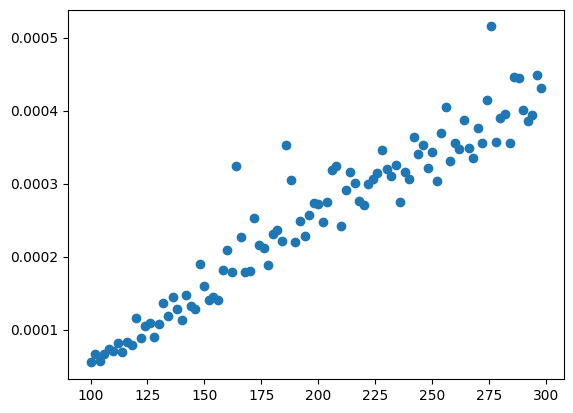

In [5]:
from matplotlib import pyplot
import random
import time

t=[]
h=[]

for i in range(90):
    t.append(i)

tiempos_medios=[]

for i in range(100,300,2):
    h.append(i)
    for e in range(i-10,i):
        t.append(e)
    tiempos=[]    
    for e in range(5):
        perm = np.random.permutation(t)
        inicio=time.time()
        qselect_nr(perm,10) #siete por poner alguna k
        tiempos.append(time.time()-inicio)
        
    tiempos_medios.append(sum(tiempos)/5)

print(plt.scatter(h,tiempos_medios))

        